# Forecasting Forex Exchange Rates Using Time Series Models

# Importing Libriaries


In [87]:
#!pip install alpha_vantage

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from alpha_vantage.foreignexchange import ForeignExchange 

In [3]:
api_key = "968U93YONJTBSCFS"   #My Api Key

In [24]:
# Initialize the ForeignExchange class
fx = ForeignExchange(key= "api_key", output_format="pandas")

## Getting USD/UGX Data

In [25]:
# Get the daily exchange rates
data, meta_data = fx.get_currency_exchange_daily(from_symbol="USD", to_symbol="UGX", outputsize="full")

In [26]:
data.head(2)

,1. open,2. high,3. low,4. close
date,,,,
2024-08-02,3730.3,3730.3,3730.3,3730.3
2024-08-01,3716.2,3731.6,3716.2,3730.3


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2024-08-02 to 2014-11-24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1. open   2526 non-null   float64
 1   2. high   2526 non-null   float64
 2   3. low    2526 non-null   float64
 3   4. close  2526 non-null   float64
dtypes: float64(4)
memory usage: 98.7 KB


In [28]:
data.describe()

,1. open,2. high,3. low,4. close
count,2526.000000,2526.000000,2526.000000,2526.000000
mean,3598.328622,3604.756572,3593.572644,3599.896714
std,227.162608,215.081150,227.167132,215.248983
min,31.200000,2745.000000,31.000000,2735.000000
25%,3549.525000,3550.500000,3545.000000,3549.600000
50%,3664.500000,3665.650000,3662.100000,3664.550000
75%,3727.700000,3732.600000,3723.000000,3728.075000
max,3934.800000,3934.800000,3930.400000,3934.800000


## Getting USD/KES Data

In [29]:
# Get the daily exchange rates
data2, meta_data = fx.get_currency_exchange_daily(from_symbol="USD", to_symbol="KES", outputsize="full")

In [30]:
data2.head(2)

,1. open,2. high,3. low,4. close
date,,,,
2024-08-02,128.98,129.48,128.98,129.48
2024-08-01,128.48,129.48,128.48,128.98


In [31]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2527 entries, 2024-08-02 to 2014-11-24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1. open   2527 non-null   float64
 1   2. high   2527 non-null   float64
 2   3. low    2527 non-null   float64
 3   4. close  2527 non-null   float64
dtypes: float64(4)
memory usage: 98.7 KB


In [32]:
data2.describe()


,1. open,2. high,3. low,4. close
count,2527.000000,2527.000000,2527.000000,2527.000000
mean,110.358833,110.542932,110.168916,110.375497
std,14.749350,14.780200,14.687320,14.749535
min,90.000000,90.000000,89.750000,90.000000
25%,101.300000,101.400000,101.150000,101.280000
50%,103.450000,103.700000,103.350000,103.500000
75%,113.775000,113.850000,113.600000,113.800000
max,162.980000,163.250000,162.280000,162.980000


# EDA

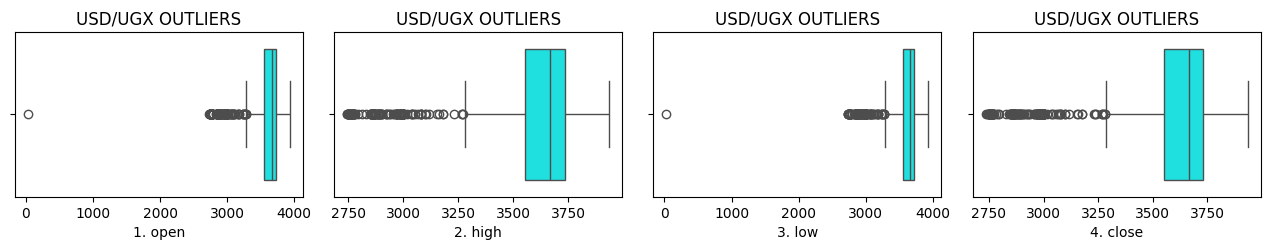

In [33]:
fig=plt.figure(figsize=(16,20))
for var in range(len(data.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=data.iloc[:,var],color="cyan")
    plt.title("USD/UGX OUTLIERS")
plt.tight_layout()
plt.show()

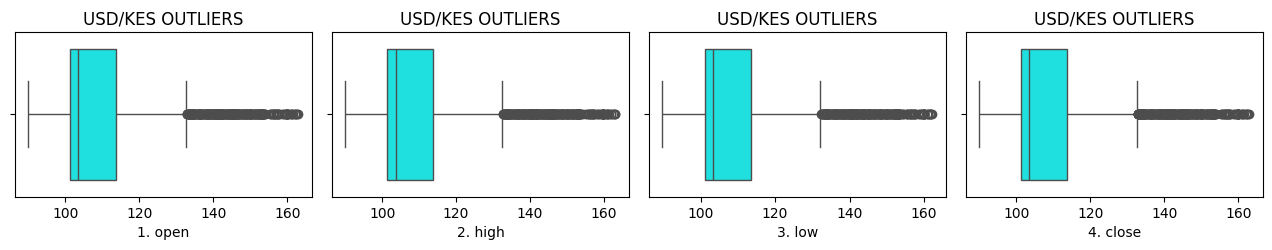

In [34]:
fig=plt.figure(figsize=(16,20))
for var in range(len(data2.columns)):
    fig.add_subplot(9,5,var+1)
    sns.boxplot(x=data2.iloc[:,var],color="cyan")
    plt.title("USD/KES OUTLIERS")
plt.tight_layout()
plt.show()

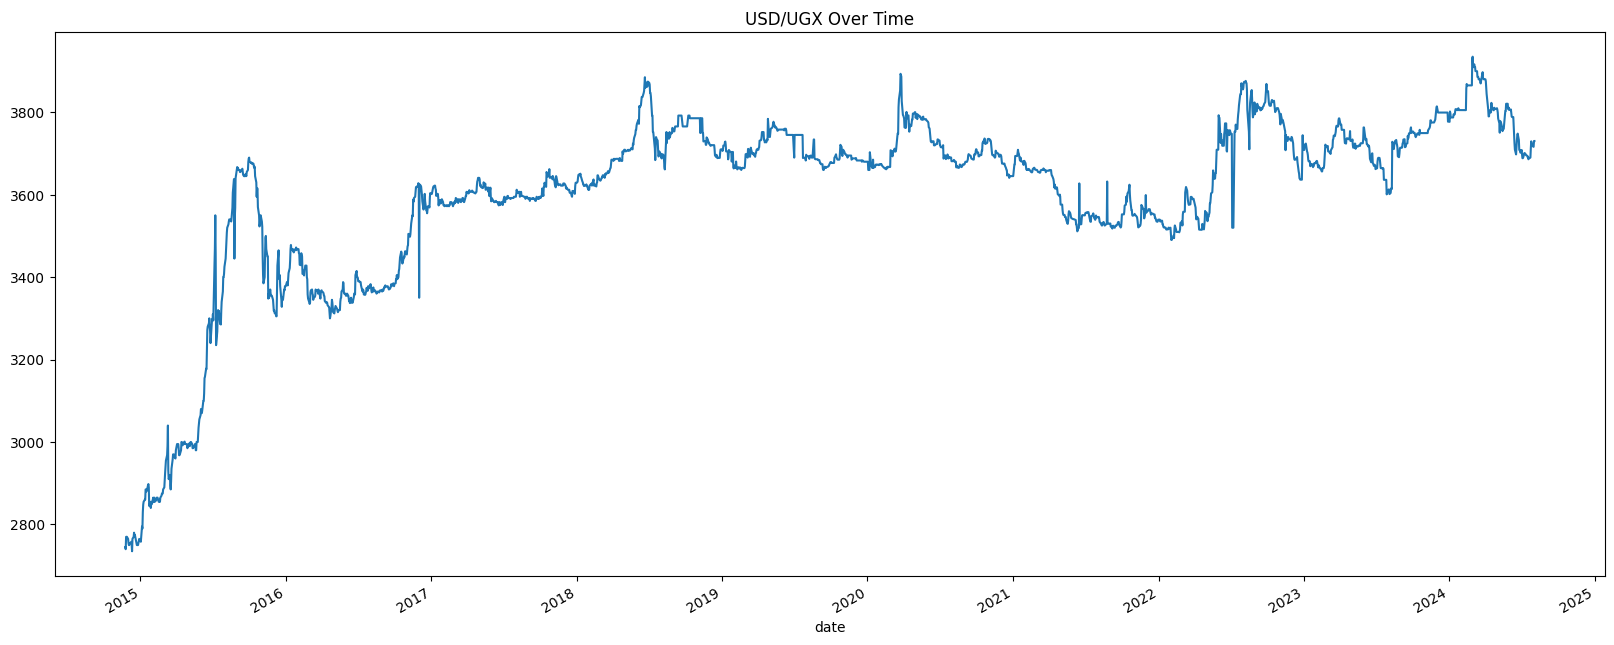

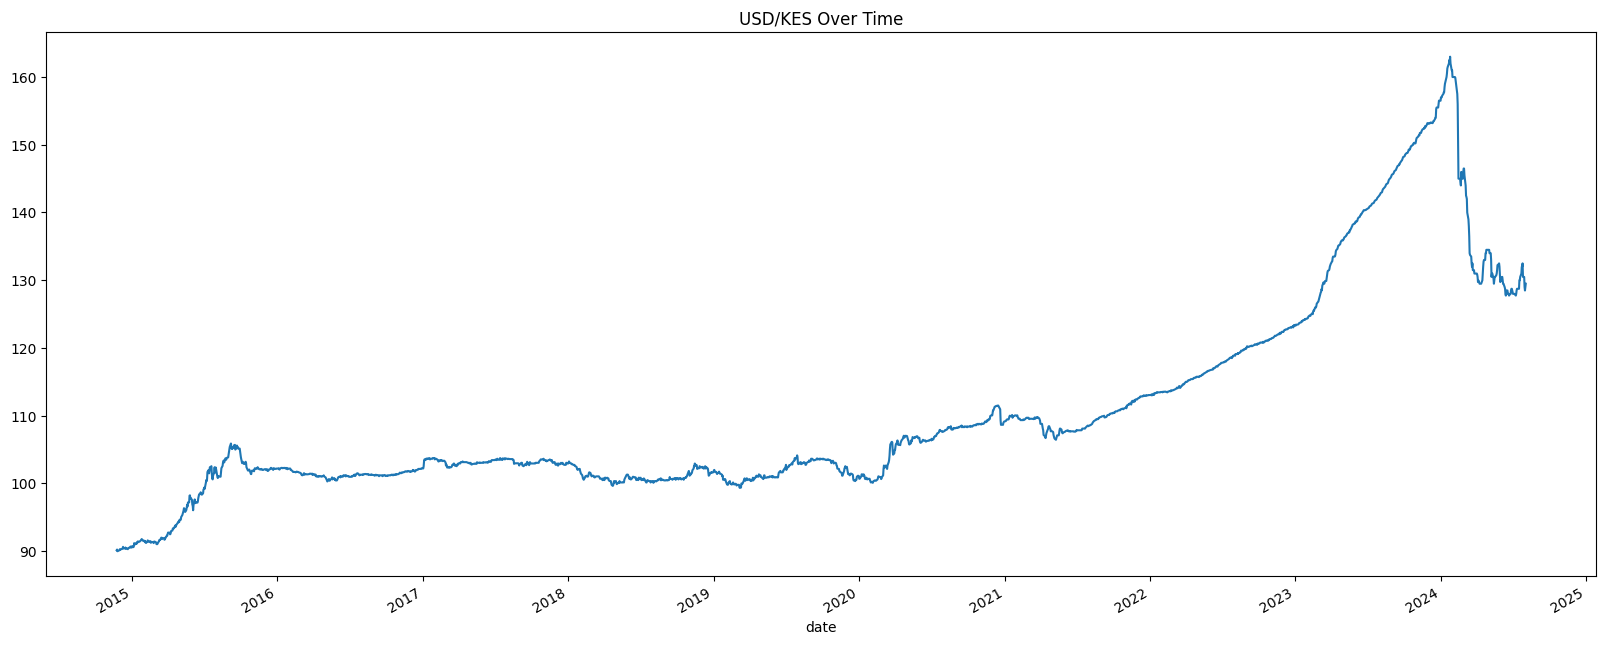

In [37]:
data["4. close"].plot(figsize=(20,8))
plt.title("USD/UGX Over Time")
plt.show()

data2["4. close"].plot(figsize=(20,8))
plt.title("USD/KES Over Time")
plt.show()